# Pymaceuticals Inc.
---

### Analysis

The analysis below examines the relationship of various drug treatment regimens to the volume of tumors in experimental mice for treatment periods spanning up to 45 days.

The n of sample mice was 248, with 50.4% Male sample mice, and 49.6% Female sample mice.

The process for analysis was as follows:

1. The sample data was merged into a single dataframe by Mouse ID.
2. Any repeat data was dropped from the dataframe for the remainder of analysis.
3. The mean, median, variance, standard deviation, and standard error was established across each treatment regimen.
4. The sample size of each treatment regimen was established.
5. The quartiles and outliers were calculated and plotted for 4 of the treatment regimens(Capomulin, Ramicane, Infubinol, and Ceftamin).
6. The Capomulin treatment group was isolated and evaluated for two metrics:
    
    A. Tumor size over time (for one random subject)
    
    B. Average tumor size vs. weight of subject (across all in the treatment group)

The following conclusions can be taken from the analysis: 

1. Samples from the Capomulin and Ramicane group show the smallest average tumor volumes of all treatment regimens as well as the smallest final tumor volumes of any of the four selected treatment regimens.

2. Tumor Volume decreases for Capomulin group subjects across time, reaching it's minimum volume on days 30-40 of treatment.

3. Mouse subject weight shows a 70.9% correlation to tumor volumeamong subjects in the Capomulin group.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [20]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data.duplicated(['Mouse ID', "Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
#Find the mouse IDs of all duplicate mice
dropped_ids = combined_data['Mouse ID'][combined_data.duplicated(['Mouse ID', "Timepoint"])]

In [23]:
# Create a clean DataFrame by dropping the duplicate mice by their IDs.
final_data = combined_data[~combined_data['Mouse ID'].isin(dropped_ids)]
final_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
len(final_data['Mouse ID'].unique())

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = pd.Series(final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(), name = "Mean Tumor Volume")
medians = pd.Series(final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(), name = "Median Tumor Volume")
variance = pd.Series(final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(), name = "Tumor Volume Variance")
stdev = pd.Series(final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(), name = "Tumor Volume Std. Dev.")
stderr = pd.Series(final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(), name = "Tumor Volume Std. Err.")

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.concat([means, medians, variance, stdev, stderr], axis=1)
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggsummary = final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggsummary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

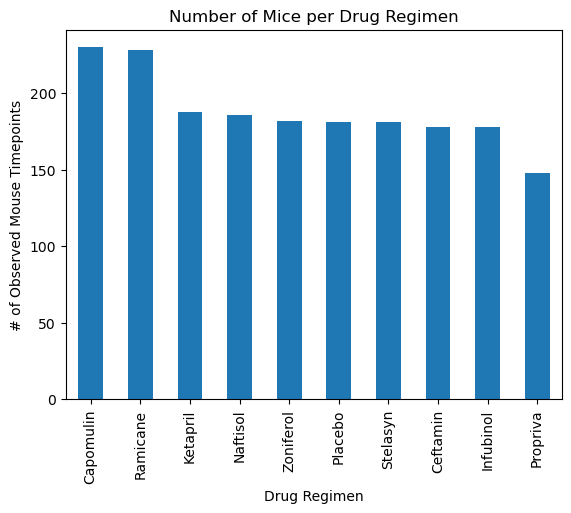

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
final_data.groupby("Drug Regimen")["Mouse ID"].size().sort_values(ascending=False) \
.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", title="Number of Mice per Drug Regimen");

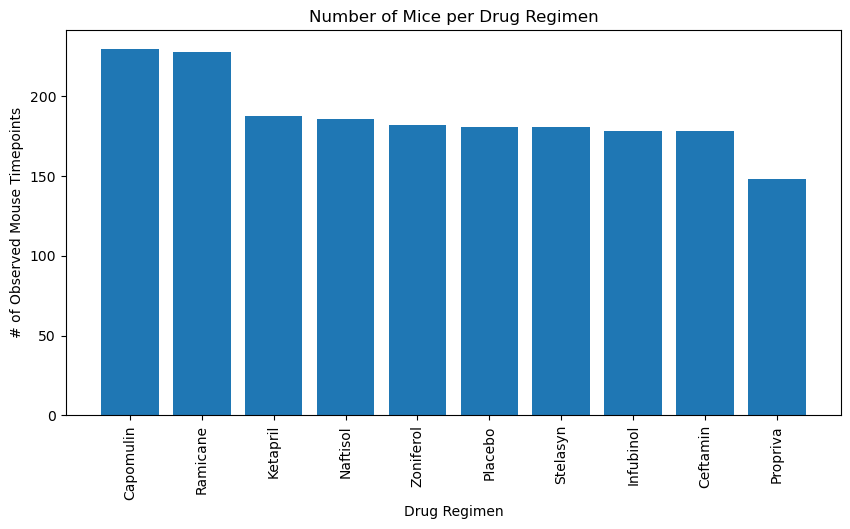

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Generate Data for Charting
count_data = final_data['Drug Regimen'].value_counts()

#set x-axis params 
x_axis = np.arange(len(count_data))
tick_locations = [value for value in x_axis]

#set figure size
plt.figure(figsize=(10,5))

#Plot Data and rotate xticks
plt.bar(x_axis, count_data, align="center")
plt.xticks(tick_locations, count_data.keys(), rotation="vertical")

#set label/title values
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

In [29]:
#check for incomplete data set (i.e. does each mouse have all timepoints recorded)
final_data.groupby('Mouse ID')['Timepoint'].size()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 248, dtype: int64

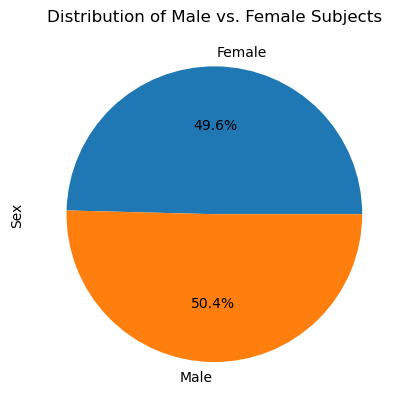

In [30]:
#Generate a dataset of unique mouse ids
unique_mouse_data = final_data.drop_duplicates(subset=['Mouse ID'])

# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mouse_data.groupby('Sex')['Sex'].value_counts() \
.plot(kind="pie", ylabel="Sex", title="Distribution of Male vs. Female Subjects", autopct="%1.1f%%");

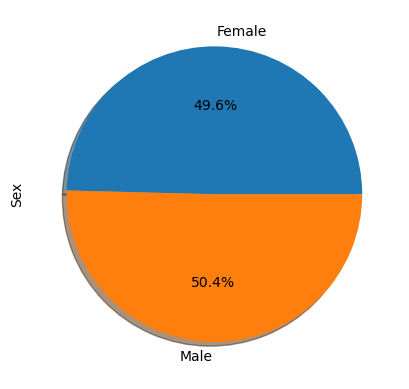

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = unique_mouse_data.groupby('Sex')['Sex'].value_counts() 
labels = ['Female', 'Male']
plt.pie(data, autopct="%1.1f%%", labels=labels, shadow=True, startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = pd.DataFrame(final_data.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
results_df = pd.merge(final_data, last_tp, on=['Mouse ID', 'Timepoint'])
results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# loop through the treatments 
for treatment in treatments:
    
    #create dataframe for current treatment
    treatment_df = results_df[['Mouse ID', 'Tumor Volume (mm3)']][results_df['Drug Regimen'] == treatment]        
    tumor_volume_data.append(treatment_df['Tumor Volume (mm3)'])
    
    #find quartiles and iqf
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr) 
    outliers = list(treatment_df['Mouse ID'][(treatment_df['Tumor Volume (mm3)'] > upperbound) \
                                             | (treatment_df['Tumor Volume (mm3)'] < lowerbound)])
    
    # Display results
    print(f'The IQR of {treatment} is {iqr}')
    if not outliers:
        print(f'{treatment} has no outliers')
    else:
        print(f'The potential outliers of {treatment} are Mouse IDs: {outliers}')


The IQR of Capomulin is 7.781863460000004
Capomulin has no outliers
The IQR of Ramicane is 9.098536719999998
Ramicane has no outliers
The IQR of Infubinol is 11.477135160000003
The potential outliers of Infubinol are Mouse IDs: ['c326']
The IQR of Ceftamin is 15.577752179999997
Ceftamin has no outliers


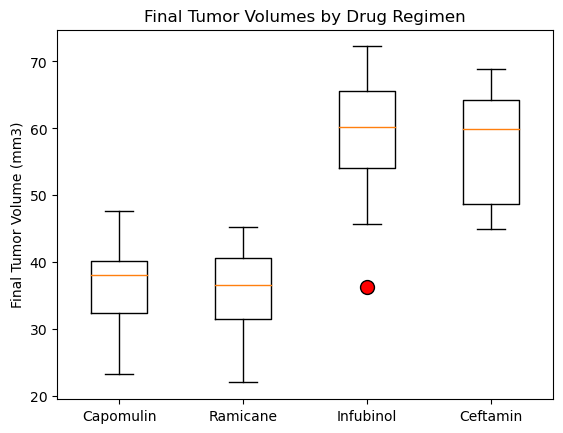

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots()
ax.set_title('Final Tumor Volumes by Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(tumor_volume_data, labels=treatments,
          flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

In [46]:
# capture a random sample from mice treated with Capomulin
capomulin_df = pd.DataFrame(final_data[final_data['Drug Regimen'] == "Capomulin"])
random_mouse_id = random.choice(list(capomulin_df['Mouse ID'].unique())) 
sample_mouse_stats = capomulin_df[capomulin_df['Mouse ID'] == random_mouse_id].sort_values('Timepoint') 
sample_mouse_stats

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0
200,i738,Capomulin,Female,23,20,25,34.973438,0
201,i738,Capomulin,Female,23,20,30,35.578780,1
202,i738,Capomulin,Female,23,20,35,36.175953,1
203,i738,Capomulin,Female,23,20,40,36.843898,2
204,i738,Capomulin,Female,23,20,45,37.311846,2


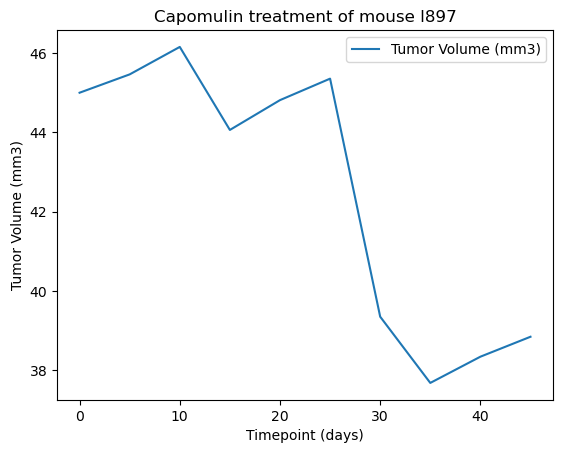

In [45]:
# Generate a line plot of tumor volume vs. time point for the sample mouse
sample_mouse_stats.plot.line('Timepoint', 'Tumor Volume (mm3)', \
                             xlabel="Timepoint (days)", \
                             ylabel='Tumor Volume (mm3)', \
                             title=f'Capomulin treatment of mouse {random_mouse_id}');

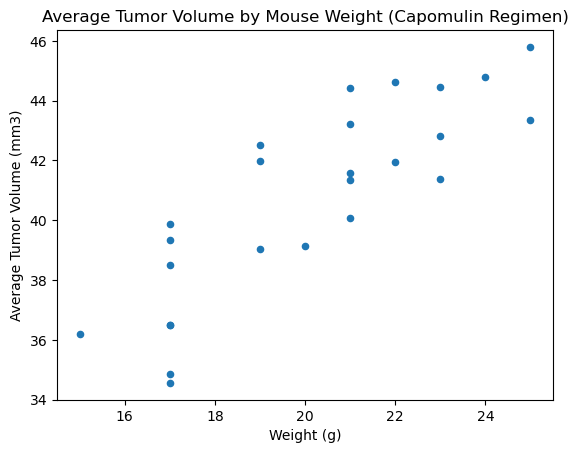

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor = pd.Series(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean(), name="Average Tumor Volume (mm3)")
weights = pd.Series(capomulin_df.groupby('Mouse ID')['Weight (g)'].max(), name="Weight (g)")
comparison_df = pd.concat([weights, average_tumor], axis=1)
comparison_df.plot.scatter('Weight (g)', 'Average Tumor Volume (mm3)', \
                           title="Average Tumor Volume by Mouse Weight (Capomulin Regimen)");

## Correlation and Regression

The correlation coefficient is: 0.7088568047708723


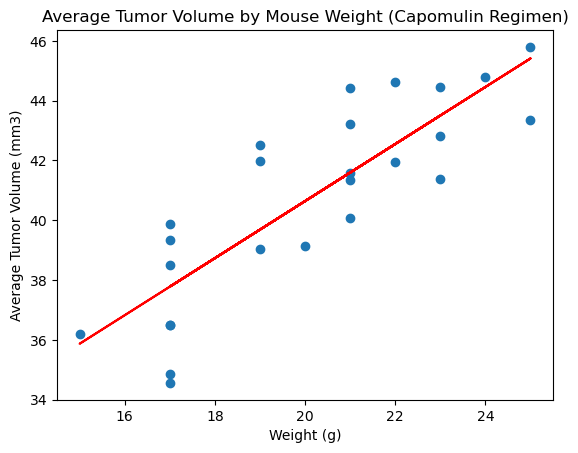

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = comparison_df['Weight (g)']
tumor = comparison_df['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor)
plt.plot(weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume by Mouse Weight (Capomulin Regimen)")
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()